<a href="https://colab.research.google.com/github/andremarinho17/data_projects/blob/master/Analise_da_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro




A criminalidade no Brasil tem crescido cada vez mais. Segundo o [portal G1](https://g1.globo.com/monitor-da-violencia/noticia/2021/02/12/brasil-tem-aumento-de-5percent-nos-assassinatos-em-2020-ano-marcado-pela-pandemia-do-novo-coronavirus-alta-e-puxada-pela-regiao-nordeste.ghtml), após dois anos de queda, a violência voltou a crescer no país, registrando um aumento de 5% nos assassinatos em 2020, ano marcado pela pandemia da COVID-19. Este crescimento atinge diversas cidades. Um estudo realizado pelo [Monitor da Violência](https://g1.globo.com/ba/bahia/noticia/2021/02/12/monitor-da-violencia-bahia-registra-maior-quantidade-de-mortes-violentas-pelo-segundo-ano-seguido.ghtml) relacionado ao ano de 2020, chegou a conclusão de que os estados com maior número de crimes violentos são Bahia (5.276), Ceará (4.039), Pernambuco (3.759) e Rio de Janeiro (3.653) respectivamente. 

Com as leis atuais de acesso à informação e a consciêntização de orgãos públicos, é possível ter acesso aos dados, realizar estudos e entender mais a fundo diversos fenômenos da sociedade, inclusive a criminalidade. Um grande exemplo é o governo do Rio de Janeiro, que traz a iniciativa do [portal ISPDados](http://www.ispdados.rj.gov.br/).

Este projeto tem como objetivo realizar um estudo da criminalidade no Rio de Janeiro, por meio da extração e análise de informações estatísticas relevantes acerca da violência na cidade maravilhosa.

<p align="center"><img alt="Rio de Janeiro" width="70%" src="https://raw.githubusercontent.com/andremarinho17/imagens/main/cropped-Rio-de-Janeiro-at-Night.jpg"></p>



## Obtenção dos Dados

Os dados foram obtidos diretamente do portal ISPDados, página de Dados Abertos do Instituto de Segurança Pública. No portal, é possível acessar as fontes de dados que contem registros criminais e de atividade policial no Rio de Janeiro.

Segundo o portal, as estatísticas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria do Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares que são fornecidas pela Secretaria do Estado de Polícia Militar do Rio de Janeiro (SEPM). Os registros de ocorrência são submetidos ao controle de qualidade realizado pela Corregedoria Geral da Polícia (CGPOL) da Secretaria de Estado de Polícia Civil e, posteriormente, consolidados pelo ISP. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

### Importando os dados

In [ ]:
# instalando algumas ferramentas necessárias
!pip install pywaffle -q

     |████████████████████████████████| 532kB 25.4MB/s 


In [ ]:
# importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from pywaffle import Waffle

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


## Análise Inicial dos Dados

Com o objetivo de entender o dataset em estudo, irei extrair algumas informações a respeito, como dimensões, colunas, tipos de variáveis, etc. Primeiro, irei verificar as dimensões do dataset.


In [ ]:
# verificação da dimensão do dataset
print("Variáveis: ", df.shape[1])
print("Entradas: ", df.shape[0])

Variáveis:  56
Entradas:  344


A par das dimensões do dataset, agora é preciso entender as variáveis presentes nele. Para isso, vou imprimir o nome das colunas.

In [ ]:
# verficação das colunas do dataset

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

O dataset é composto por diversas variáveis, desde o ano do crime em questão, mês e os tipos de crimes relacionados. Além disso, é necessário verificar o tipo dessas variáveis para o melhor entendimento. Este tipo de informação auxilia no processo de limpeza dos dados.

In [ ]:
# verificação dos tipos das variáveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

O dataset é composto, majoritariamente, por variáveis do tipo inteiro e float. Segue o dicionário das variáveis.

**Dicionário de Variáveis**
* vano : Ano de Registro
* mes : Mês de Registro
* hom_doloso : Registros de Homicidio Doloso
* lesao_corp_morte : Registros de Lesão Corporal com Morte
* latrocinio : Registros de Latrocinio
* hom_por_interv_policial : Registros de Homicidios por Intervenção Policial
* tentat_hom : Registros de Tentativas de homicidios
* lesao_corp_dolosa : Registros de Lesão Corporal Dolosa
* estupro : Registros de Casos de Estrupros
* hom_culposo : Registros de Homicidio Culposo
* lesao_corp_culposa : Registros de Lesão Corporal Culposa
* roubo_comercio : Registros de Roubos em Comércios
* roubo_residencia : Registros de Roubos em Residências
* roubo_veiculo : Registros de Roubos de Veículos
* roubo_carga : Registros de Roubos de Cargas
* roubo_transeunte : Registros de Roubos de Transeunte
* roubo_em_coletivo : Registros de Roubos em Coletivo
* roubo_banco : Registros de Roubo à Bancos
* roubo_cx_eletronico : Registros de Roubo à Caixas Eletrônicos
* roubo_celular : Registros de Roubo de Celulares
* roubo_conducao_saque : Registros de Roubo Conduzindo ao Saque
* roubo_apos_saque : Registros de Roubos após a relazação de Saques
* roubo_bicicleta : Registros de Roubo de Biciletas
* outros_roubos : Registros de Outros roubos
* total_roubos : Registros do Total de Roubos
* furto_veiculos : Registros de Furto de Veículos
* furto_transeunte : Registros de Furtos de Transeuntes
* furto_coletivo : Registros de Furtos Coletivos
* furto_celular : Registro de Furtos de Celulares
* furto_bicicleta : Registro de Furtos de Bicicleta
* outros_furtos : Registro de Outros Furtos
* total_furtos : Registro do Total de Furtos
* sequestro : Registro de Sequestro
* extorsao : Registro de Extorsão
* sequestro_relampago : Registros de Sequestro Relâmpago
* estelionato : Registros de Estelionato
* apreensao_drogas : Registros de Apreensão de Drogas
* posse_drogas : Registros de Posse de Drogas
* trafico_drogas : Registro de Tráfico de Drogas
* apreensao_drogas_sem_autor : Registro de Apreensão de Drogas sem Autor
* recuperacao_veiculos : Registro de Recuperação de veículos roubados ou furtados
* apf : Registro de Apreensão em Prisão em Flagrante
* aaapai : Apreensão de Adolescente pela Prática de Ato Infracional
* cmp : Cumprimento de Mandado de Prisão
* cmba : Cumprimento de Mandado de Busca e Apreensão
* ameaca : Registro de Ameaças
* pessoas_desaparecidas : Registro de Pessoas Desaparecidas
* encontro_cadaver : Registro de Cadaveres Encontrados
* encontro_ossada : Registro de Ossadas Encontradas
* pol_militares_mortos_serv : Registro de Policiais militares Mortos em serviço
* pol_civis_mortos_serv : Registro de Policiais Civis mortos em Serviço
* indicador_letalidade : Indicador de letalidade
* indicador_roubo_rua : Indicador de Roubo de Rua
* indicador_roubo_veic : Indicador de Roubo de Veículo
* registro_ocorrencias : Total de Ocorrências Registradas
* fase : Fase da Operação:
fase 2 - Consolidado sem errata
fase 3 - Consolidado com errata

Ciente das informações relacionadas a dimensão, colunas e tipos de variáveis, irei imprimir as cinco primeiras entradas do dataset para ter uma visão inicial do conjunto e verificar também a quantidade de valores ausentes. 

In [ ]:
# impressão das cinco primeiras entradas do dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
# verificação dos valores ausentes 
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

É possível observar que as variáveis relacionadas a roubos, furtos de bicicletas e apreensão de drogas possuem um percentual considerável de valores ausentes. Entretanto, as variáveis relacionadas a bicicletas não entrarão no escopo da análise em questão.

Como os dados são estruturados ao longo do tempo, pode-se realizar as análises estatísticas a partir do período em que estes crimes começaram a ser registrados. Além disso, é possível extrair outras informações relevantes a respeito de crimes por ano e por mês e categorizar os crimes (Contra a Vida, Patrimônio, etc).

## Informações Estatísticas da Violência no Rio de Janeiro

Com o conhecimento do conjunto de dados, agora é possível extrair as informações estatísticas relevantes e realizar o estudo acerca da criminalidade no Rio de Janeiro. Primeiramente, irei verificar como os dados estão distribuídos, pois assim é possível detectar outliers, falhas na distribuição e inferir hipóteses para realizar a limpeza correta. 


In [ ]:
# verificação da distribuição dos dados
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Para ter uma melhor visão da distribuição, irei plotar o histograma das variáveis.

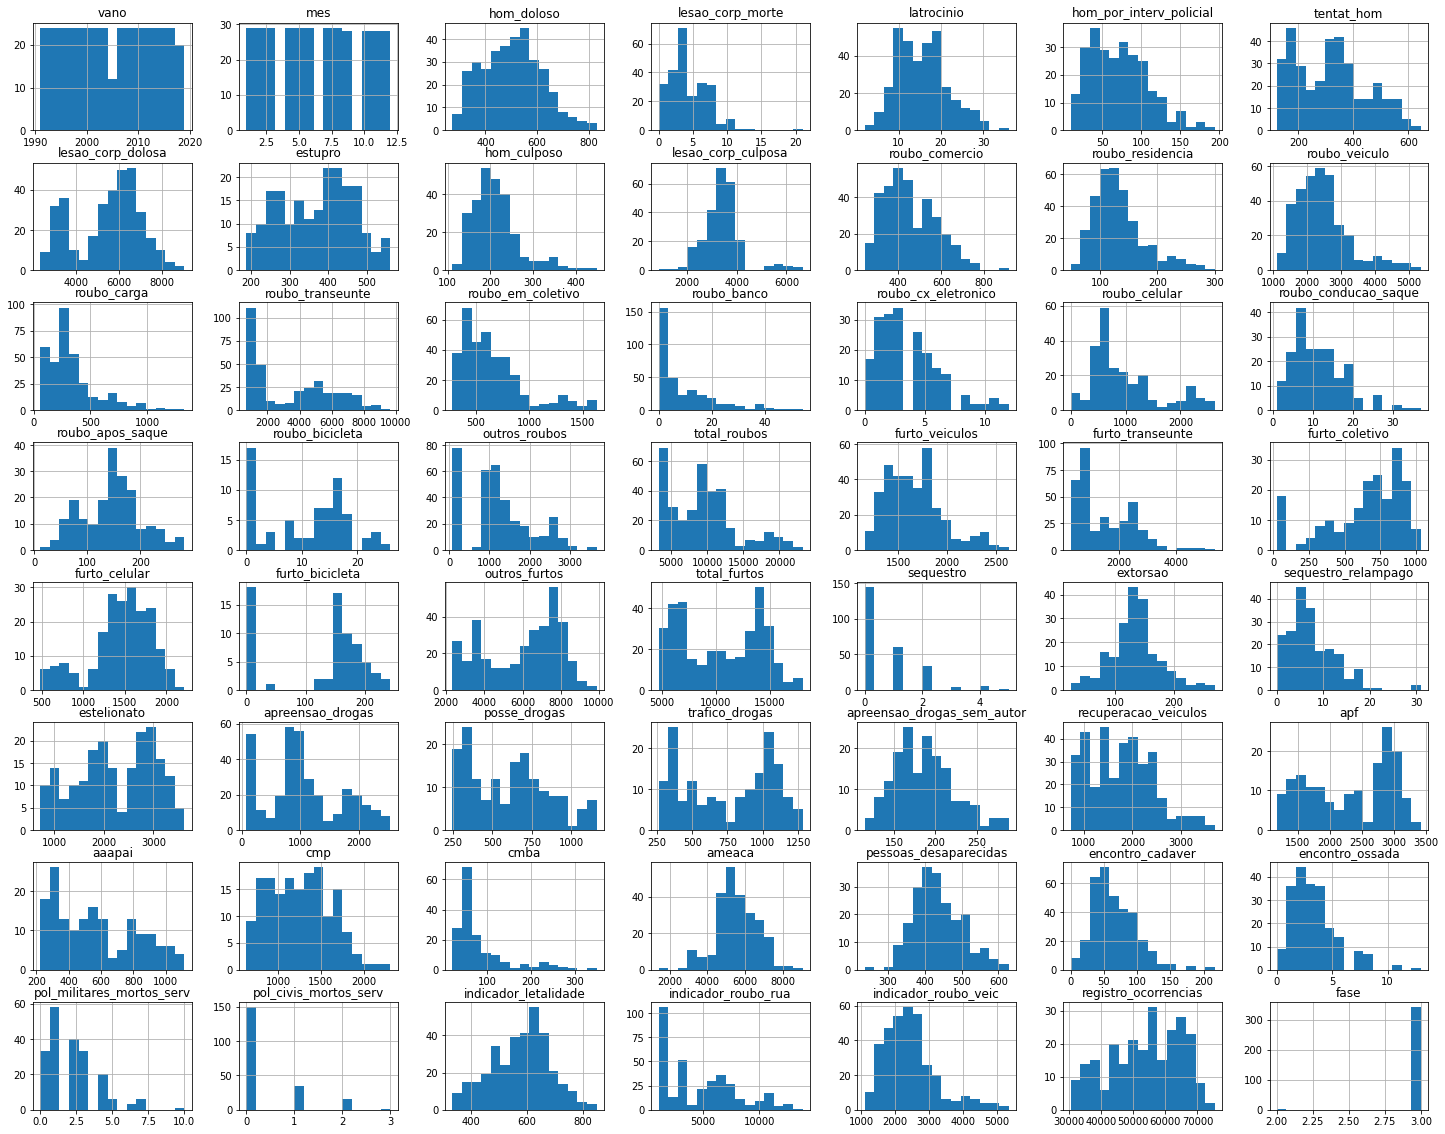

In [ ]:
df.hist(bins=15, figsize=(25,20))
plt.show()

É possível observar que maioria das variáveis estão bem distribuídas no datasets. Algumas como lesao_corp_morte, lesao_corp_culposa e roubo_banco possuem outliers. Porém, essas variáveis não serão estudadas no projeto em questão. 

Nas seções a seguir, começarei as análises estatísticas a respeito de crimes contra a vida e contra o patrimônio.

### Crimes Contra o Patrimônio - Veículos

Crimes contra o patrimônio, tais como estelionato, furto e roubo - principalmente de veículos - são bem frequentes em grandes cidades do Brasil. No conjunto de dados, há variáveis relacionadas há esses tipos de crimes, o que possibilita uma análise e extração de informação relevante para que esses tipos de crimes sejam combatidos. 

A seguir, irei verificar a média dos roubos e furtos de veículos e consequentemente, a média de recuperação dos mesmos. 

In [ ]:
# Verificando a média de roubo de veículos 
media_roubos = df.roubo_veiculo.mean()
print("Média de roubo de veículos: ", round(media_roubos, 2))

Média de roubo de veículos:  2448.7


In [ ]:
# Verificando a média de furto de veículos
media_furtos = df.furto_veiculos.mean()
print("Média de furto de veículos: ", round(media_furtos, 2))

Média de furto de veículos:  1674.67


In [ ]:
# Verificando a média dos veículos recuperados
media_recuperacao = df.recuperacao_veiculos.mean()
print("Média dos veículos recuperados: ", round(media_recuperacao, 2))

Média dos veículos recuperados:  1772.24


Como é possível observar, o Rio de Janeiro possui uma média geral aproximada de 2448 veículos roubados e 1674 de veículos furtados, ao passo que a média dos veículos recuperados é aproximada de 1772. 

A seguir, vou verificar o quanto as pessoas conseguem recuperar seus veículos através do cálculo percentual.

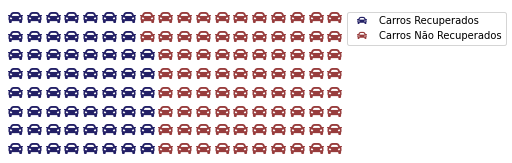

Porcentagem de carros recuperados: 42.98%


In [ ]:
# Total dos veículos perdidos
total = media_roubos + media_furtos

# Percentual de veículos recuperados
percentual_recuperacao = media_recuperacao / total * 100

fig = plt.figure(
    FigureClass=Waffle,
    rows=8,
    columns=18,
    colors=("#232066", "#983D3D"),
    values=[percentual_recuperacao, 100-percentual_recuperacao], icons='car', icon_size=15,
    icon_legend=True,
    legend={
        'labels': ['Carros Recuperados', 'Carros Não Recuperados'],
        'loc': 'upper left',
        'bbox_to_anchor': (1, 1)
    }
)

fig.set_tight_layout(False)
plt.show();
print("Porcentagem de carros recuperados: {:.2f}%".format(percentual_recuperacao))

Observa-se que apenas 42,98% dos veículos perdidos são recuperados. Tal dado alerta para a elaboração de políticas públicas por parte dos Governos Estaduais que busquem incentivar as vítimas de crimes contra o patrimônio a buscar a recuperação, mas ao mesmo tempo, também é necessário políticas que ajudem estes cidadãos da melhor forma possível durante o processo de recuperação. Além disso, também é uma alerta para que a segurança pública nas ruas, vias e rodovias seja reforçada. 

### Crimes Contra a Vida

Os crimes contra a vida (homicídios dolosos, latrocínios e lesões corporais seguidas de morte) são recorrentes no Rio de Janeiro e, como dito anteriormente, o Estado figura na 4ª posição daqueles com maior quantidade de mortes violentas, totalizando 3.653 Crimes Violentos Letais Intencionals (CVLI). 

Diante do exposto, uma análise se faz necessária para ajudar no combate a esses tipos de crimes. A seguir, irei verificar quais foram os anos com menor e maior número de homicídios dolosos respectivamente.

In [ ]:
# maximo e minimo de homicidio doloso
maximo_hom_doloso = df.hom_doloso.max() 
minimo_hom_doloso = df.hom_doloso.min()

print("Máximo de Homicídios dolosos: ", maximo_hom_doloso)
print("Mínimo de Homicídios dolosos: ", minimo_hom_doloso)

Máximo de Homicídios dolosos:  831
Mínimo de Homicídios dolosos:  272


Observa-se que a data que teve menos homicídios dolosos resultou em 272 ocorrências, ao passo que a data com mais homicídios resultou em 831 ocorrências. Abaixo, verificarei as datas dessas ocorrências. 

In [ ]:
# verificando a data de maior ocorrência de homicídios dolosos
df[df['hom_doloso'] == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


In [ ]:
# verificando a data de menor ocorrência de homicídios dolosos
df[df['hom_doloso'] == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


Pode-se observar que foi no ano de 1995 que teve o maior registro de homicídios dolosos (831) e o ano de 2015 teve o menor registro (272). É possível levantar uma hipótese de que a quantidade de homicídios dolosos caiu com o tempo, o que é um bom sinal. Para isso, irei utilizar de técnicas de visualização de dados para explorar como essa e outras variáveis se comportam ao longo do tempo

## Visualização de Dados

Gráficos de linhas e histogramas são tipos de visualização poderosos que nos ajudam a entender como as variáveis se comportam. O histograma nos auxilia a entender como estão distribuídas as variáveis e o gráfico de linha no estudo em questão é importantíssimo, pois com ele podemos realizar o estudo do comportamento de diferentes crimes ao longo do tempo, como homicídio doloso, estupro e total de furtos.

Primeiramente, buscarei confirmar a hipótese que fiz anteriormente: as ocorrências de homicídios dolosos caíram com o tempo?


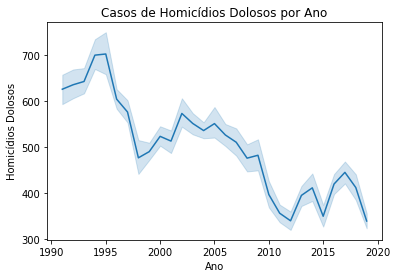

In [ ]:
# verificando os casos de homicídios dolosos ao longo do tempo

sns.lineplot(data=df, x="vano", y="hom_doloso")

plt.title("Casos de Homicídios Dolosos por Ano")
plt.ylabel("Homicídios Dolosos")
plt.xlabel("Ano")
plt.show()

Observando o gráfico acima, concluímos que as ocorrências de homicídios dolosos caíram ao longo do tempo, o que é um bom sinal! Entre os anos 2000 e 2010, as ocorrências permaneceram em alta, mas caíram no fim da década. A década seguinte foi marcada por altos e baixos.

A seguir, irei repetir o mesmo processo para verificar as ocorrências de estupros, que é uma pauta importantíssima a ser debatida e combatida. 

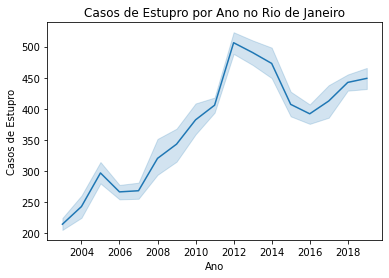

In [ ]:
sns.lineplot(data=df, x="vano", y="estupro")

plt.title("Casos de Estupro por Ano no Rio de Janeiro")
plt.ylabel("Casos de Estupro")
plt.xlabel("Ano")
plt.show()

Conforme é possível observar no gráfico acima, os casos de estupro apresentaram um recorde no ano de 2012, apresentou queda nos anos posteriores e vem em uma crescente desde o ano de 2016. É uma informação importante, pois é necessário que as autoridades repensem novas políticas públicas e reforcem campanhas de incentivo no combate ao estupro, para que a curva diminua nos próximos anos.

Com o objetivo de verificar como está a segurança da população no Rio de Janeiro, vou verificar como se comportam as ocorrências de furtos gerais nos anos em estudo. Para isso, tem a variável total_furtos, que representa uma soma de todos os tipos de furtos em estudo (de veículos, trausentes, de celular, coletivo, etc). 

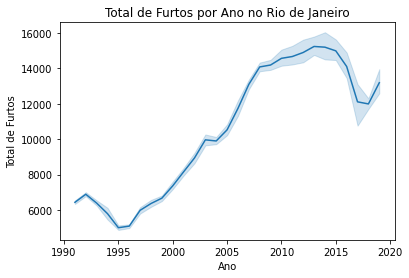

In [ ]:
sns.lineplot(data=df, x="vano", y="total_furtos")

plt.title("Total de Furtos por Ano no Rio de Janeiro")
plt.ylabel("Total de Furtos")
plt.xlabel("Ano")
plt.show()

Observa-se que os casos de furto no geral tiveram uma crescente desde 1995, apresentando altos valores entre 2010 e meados de 2015. Porém, na metade dos anos 2015-2020, as ocorrências voltaram a subir. É uma alerta de que a segurança pública no Rio de Janeiro não vai bem e é necessário que o Governo Estadual volte suas atenções para este fato.

Outro fenômeno a ser estudado é o desaparecimento de pessoas. Segundo o [Observatório do Terceiro Setor](https://observatorio3setor.org.br/noticias/perigo-ignorado-todos-os-dias-217-pessoas-desaparecem-no-brasil/), isto é um perigo ignorado, pois todos os dias, 217 pessoas desaparecem no Brasil. Dessa forma, faz-se necessário ficar atento as estatísticas relacionadas a este fato. 

A seguir, vou verificar a quantidade de pessoas desaparecidas por ano desde a última década.

In [ ]:
pessoas_desaparecidas = df[df['vano'] >= 2010].pessoas_desaparecidas.sum()

print("Pessoas desaparecidas na última década: ", pessoas_desaparecidas)

Pessoas desaparecidas na última década:  53796.0


Agora, irei verificar quantas pessoas desapareceram ao longo dos anos.

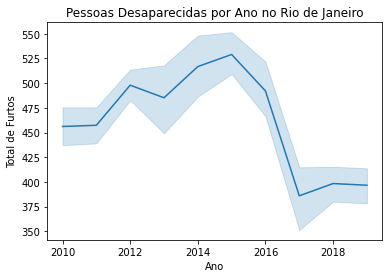

In [ ]:
sns.lineplot(data=df[df["vano"] >= 2010], x="vano", y="pessoas_desaparecidas")

plt.title("Pessoas Desaparecidas por Ano no Rio de Janeiro")
plt.ylabel("Total de Furtos")
plt.xlabel("Ano")
plt.show()

Observa-se que o número de pessoas desaparecidas cresceu bastante do início da década até 2015, ano em que teve o maior número de casos. Felizmente, este número diminuiu drasticamente na segunda metade da década. 

A seguir, irei analisar a variável roubo_em_coletivo ao longo do tempo.

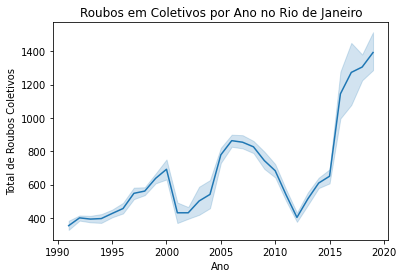

In [ ]:
sns.lineplot(data=df, x="vano", y="roubo_em_coletivo")

plt.title("Roubos em Coletivos por Ano no Rio de Janeiro")
plt.ylabel("Total de Roubos Coletivos")
plt.xlabel("Ano")
plt.show()

Pode-se concluir que os roubos coletivos vem em uma crescente expressiva desde meados de 2013 e 2014. Não é um bom sinal, pois isso significa que a segurança pública na cidade maravilhosa não vai bem e é importante ressaltar a importancia de que as autoridades dêem atenção a isso.

Por fim, irei verificar quais são os tipos de crimes por categoria mais frequentes no Rio de Janeiro dos anos 2000 até os dias de hoje. São eles: crimes contra a vida, tipos de roubo mais frequentes.

In [ ]:
# Adicionando uma linha com o total dos crimes 
df = df.append(df[df['vano'] >= 2000].sum(numeric_only=True), ignore_index=True)

In [ ]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
340,2019.0,5.0,345.0,2.0,15.0,172.0,478.0,4958.0,465.0,145.0,2304.0,514.0,93.0,3649.0,710.0,7332.0,1625.0,1.0,3.0,2427.0,9.0,87.0,7.0,2216.0,18673.0,1480.0,1475.0,715.0,1423.0,220.0,7711.0,13024.0,0.0,147.0,7.0,3498.0,2034.0,735.0,1133.0,199.0,2450.0,3169.0,527.0,1771.0,248.0,5068.0,390.0,20.0,1.0,0.0,0.0,534.0,11384.0,3649.0,68336.0,3.0
341,2019.0,6.0,332.0,3.0,8.0,153.0,436.0,4769.0,414.0,152.0,2481.0,382.0,85.0,3115.0,599.0,6077.0,1287.0,1.0,4.0,2187.0,19.0,83.0,9.0,1984.0,15832.0,1251.0,1443.0,630.0,1345.0,189.0,7224.0,12082.0,0.0,133.0,6.0,3029.0,1854.0,763.0,976.0,158.0,2041.0,2848.0,467.0,1585.0,233.0,4497.0,403.0,20.0,1.0,3.0,0.0,496.0,9551.0,3115.0,61202.0,3.0
342,2019.0,7.0,309.0,5.0,10.0,194.0,399.0,4740.0,402.0,140.0,2334.0,386.0,72.0,3198.0,691.0,6637.0,1208.0,1.0,0.0,2226.0,12.0,97.0,16.0,2110.0,16654.0,1353.0,1570.0,746.0,1391.0,230.0,7632.0,12922.0,0.0,135.0,12.0,3627.0,1861.0,709.0,996.0,187.0,2355.0,2907.0,490.0,1856.0,267.0,4678.0,400.0,32.0,7.0,0.0,0.0,518.0,10071.0,3198.0,65817.0,2.0
343,2019.0,8.0,318.0,1.0,6.0,170.0,457.0,4760.0,460.0,156.0,2437.0,433.0,103.0,3181.0,587.0,6452.0,1215.0,1.0,1.0,2245.0,9.0,98.0,17.0,1794.0,16136.0,1361.0,1568.0,674.0,1534.0,185.0,7280.0,12602.0,0.0,132.0,12.0,3546.0,1862.0,668.0,1067.0,171.0,2081.0,3114.0,476.0,2028.0,265.0,4662.0,367.0,27.0,8.0,2.0,0.0,495.0,9912.0,3181.0,65285.0,2.0
344,474204.0,1518.0,108052.0,970.0,3651.0,18050.0,90589.0,1496914.0,73989.0,47070.0,807298.0,116806.0,29489.0,636334.0,100187.0,1071979.0,176587.0,963.0,710.0,226082.0,2264.0,29133.0,735.0,363981.0,2755250.0,365641.0,449855.0,130046.0,289835.0,8487.0,1689878.0,2933742.0,165.0,26653.0,1551.0,446372.0,322348.0,99915.0,124500.0,30528.0,493490.0,380412.0,93255.0,205904.0,13619.0,1333183.0,92248.0,14694.0,700.0,417.0,68.0,130723.0,1474648.0,636334.0,12944113.0,706.0


Primeiro, verificarei os tipos de crimes contra a vida mais frequentes no Rio. 

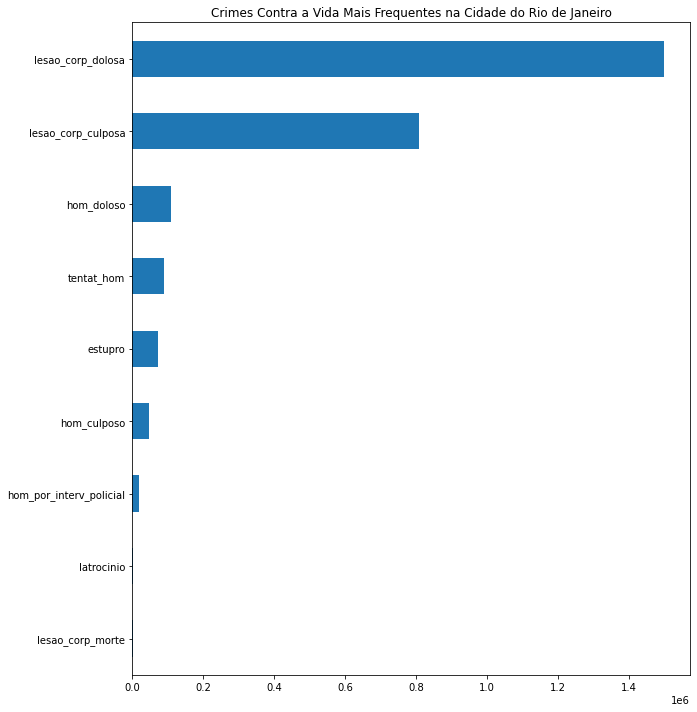

Confira os valores:


lesao_corp_dolosa          1496914.0
lesao_corp_culposa          807298.0
hom_doloso                  108052.0
tentat_hom                   90589.0
estupro                      73989.0
hom_culposo                  47070.0
hom_por_interv_policial      18050.0
latrocinio                    3651.0
lesao_corp_morte               970.0
Name: 344, dtype: float64

In [ ]:
df.iloc[344, 2:11].sort_values(ascending=True).plot.barh(figsize=(10,12))
plt.title("Crimes Contra a Vida Mais Frequentes na Cidade do Rio de Janeiro")
plt.show()

print("Confira os valores:")
df.iloc[344, 2:11].sort_values(ascending=False)

Lesão corporal dolosa e culposa são os tipos de crimes que mais contribuem para o aumento da criminalidade contra a vida na cidade do Rio de Janeiro, totalizando mais de 1 milhão do tipo doloso e aproximadamente 800 mil do tipo culposo. É necessário pensar urgentemente em soluções para este fato. 

Em seguida, verificarei os tipos de roubos mais frequentes na cidade do Rio de Janeiro.

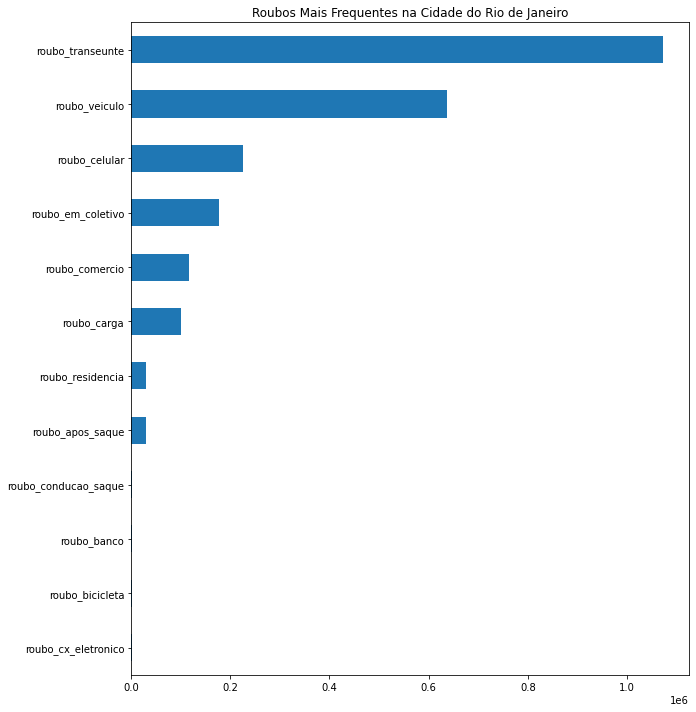

Confira os valores:


roubo_transeunte        1071979.0
roubo_veiculo            636334.0
roubo_celular            226082.0
roubo_em_coletivo        176587.0
roubo_comercio           116806.0
roubo_carga              100187.0
roubo_residencia          29489.0
roubo_apos_saque          29133.0
roubo_conducao_saque       2264.0
roubo_banco                 963.0
roubo_bicicleta             735.0
roubo_cx_eletronico         710.0
Name: 344, dtype: float64

In [ ]:
df.iloc[344, 11:23].sort_values(ascending=True).plot.barh(figsize=(10,12))
plt.title("Roubos Mais Frequentes na Cidade do Rio de Janeiro")
plt.show()

print("Confira os valores:")
df.iloc[344, 11:23].sort_values(ascending=False)

Roubo transeunte é o tipo de roubo mais frequente no Rio de Janeiro desde o ano 2000, totalidando mais de um milhão de roubos. É necessário que as autoridades  se atentem a este fato e trabalhem em políticas que reforcem a segurança dos indivíduos enquanto transitam em vias públicas.

Por fim, verificarei os tipos de furtos mais frequentes.

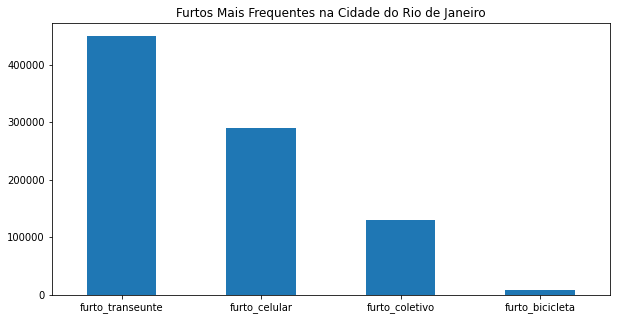

Confira os valores:


furto_transeunte    449855.0
furto_celular       289835.0
furto_coletivo      130046.0
furto_bicicleta       8487.0
Name: 344, dtype: float64

In [ ]:
df.iloc[344, 26:30].sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.title("Furtos Mais Frequentes na Cidade do Rio de Janeiro")
plt.xticks(rotation=0)
plt.show()

print("Confira os valores:")
df.iloc[344, 26:30].sort_values(ascending=False)

Furto transeunte e furto de celulares são os tipos de furtos mais frequentes na cidade maravilhosa de 2000 pra cá. Os furtos transeuntes chegam a quase meio milhão, ao passo que os furtos de celulares chegam a aproximadamente 290 mil. Dessa forma, vale novamente reforçar que é preciso repensar a segurança dos cidadãos que transitam pelo Rio.

## Conclusão

Portanto, pode-se concluir que a análise de dados é importantíssima para um estudo mais assertivo, importante e de relevância pública, que é o caso da criminalidade no Rio de Janeiro. Através dela é possível obter muitas informações valiosas dos dados e auxiliar no combate à violência e criminalidade, alertando para casos preocupantes e propondo possíveis caminhos que levem uma solução para as autoridades e que traga segurança para a população do Rio de Janeiro.

Como desafios para futuros projetos, pode-se realizar um estudo através de técnicas de séries temporais e prever casos de violência contra o patrimônio e contra a vida para os próximos meses ou anos. Dessa forma, será possível auxiliar, de uma forma ainda mais assertiva, as autoridades a tomarem decisões relacionadas a novas políticas públicas que prezem pela vida da população.